In [1]:
# importing all the libraries

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import quantile_transform
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

In [2]:
# reading the data in a DataFrame

boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price'] = boston.target
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are no missing values.

Lets analyse the data and find the relation between dependent and independent variables.

C:\Users\MADHAV\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


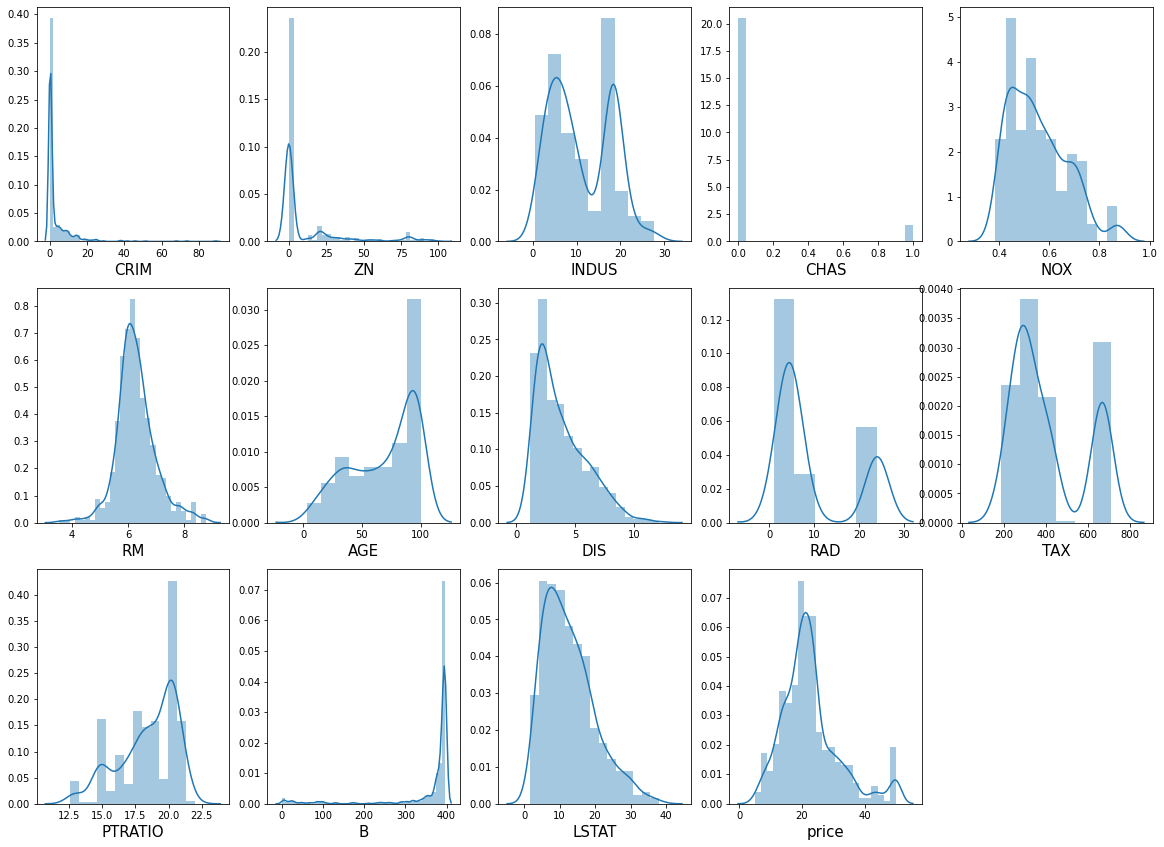

In [3]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Data seems to be skewed a lot. Lets deal with the skewness by Normalising the data

In [4]:
# Normalizing the data

t = quantile_transform(bos,output_distribution='normal',copy=True)
transf_data = pd.DataFrame(t,columns = [i for i in bos.columns])

C:\Users\MADHAV\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


C:\Users\MADHAV\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


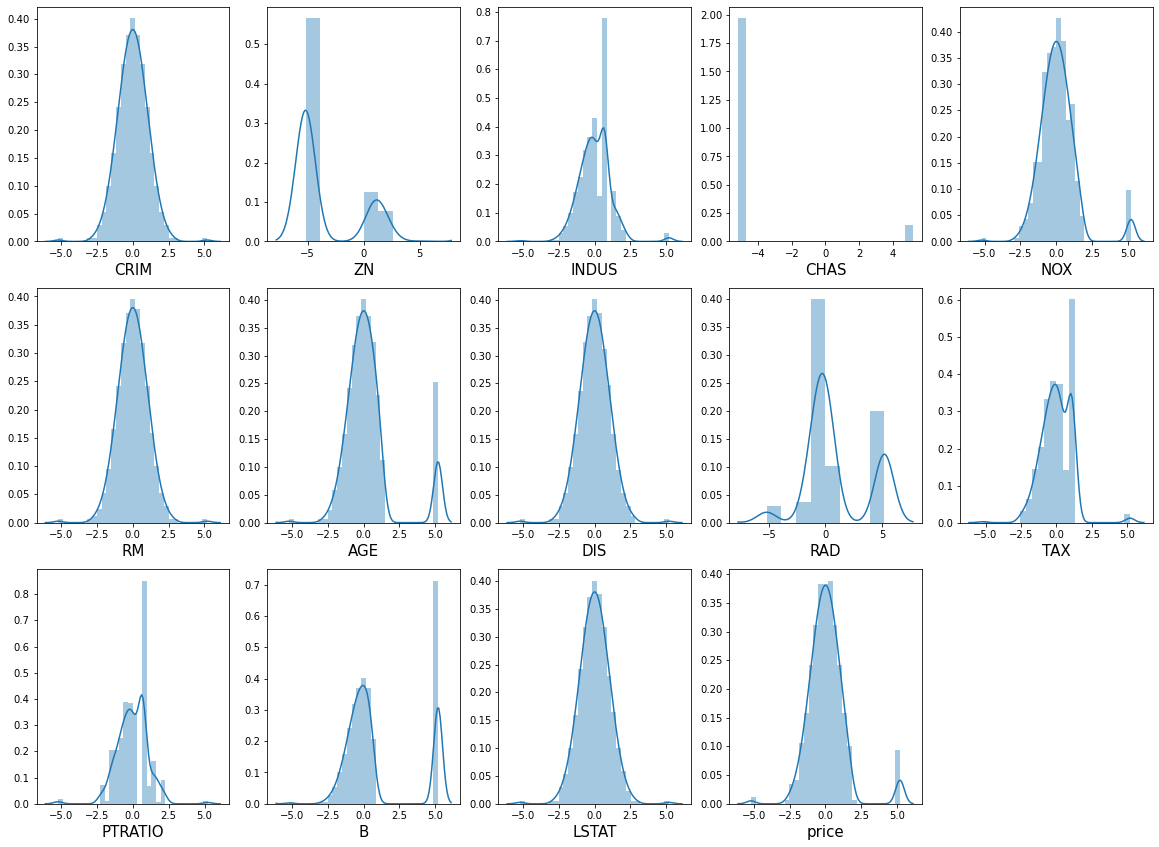

In [5]:
# let's see how transformed data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in transf_data:
    if plotnumber<=16 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(transf_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Most of the features are normaly distributed without any skewness. So we are good to go with model building

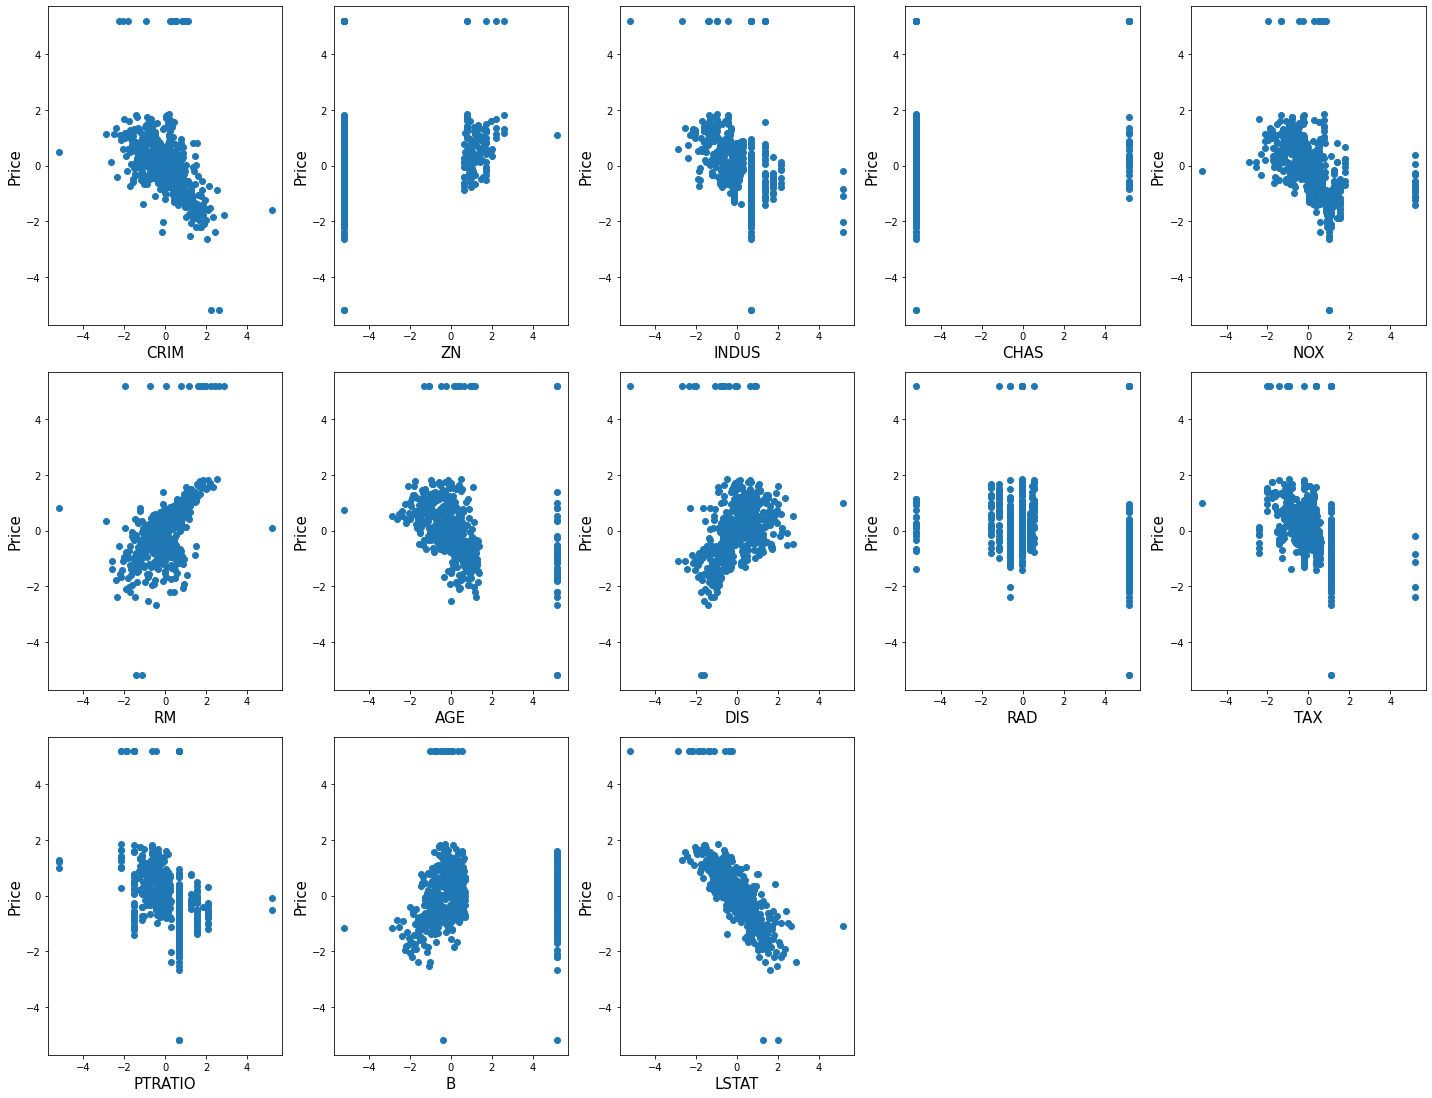

In [6]:
#Plot of price vs each feature to check the linear relation

y = transf_data['price']
X = transf_data.drop(columns = ['price'])

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,5,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Price',fontsize=15)
    plotnumber+=1
plt.tight_layout()

Not all the variables are linearly dependent on target variable. But still some of the variables are linearly dependent on target variable. So we can build a Linear Regression model for this data.

Lets check for Multicolinearity.

In [7]:
# checking the vif for each feature

variables = np.array(X)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,4.011815,CRIM
1,3.025702,ZN
2,2.914007,INDUS
3,2.590673,CHAS
4,2.550926,NOX
5,1.818233,RM
6,1.996185,AGE
7,3.462919,DIS
8,3.285597,RAD
9,2.284533,TAX


Since VIF for all variables is below 5, we verify the Multicolinearity

In [8]:
# function for adjusted R-Squared

def adj_r2(regression,x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

regression = LinearRegression()
regression.fit(x_train,y_train)
print('R2 score on training data is',regression.score(x_train,y_train))
print('Adjusted R2 score on training data is',adj_r2(regression,x_train,y_train))
print('R2 score on test data is',regression.score(x_test,y_test))
print('Adjusted R2 score on test data is',adj_r2(regression,x_test,y_test))

R2 score on training data is 0.6773390036295593
Adjusted R2 score on training data is 0.665846968142393
R2 score on test data is 0.6618050728013629
Adjusted R2 score on test data is 0.6228976917962099


There is no significant difference between the R2 score of train and test data. Hence we can say that our model is not overfitted.

There is also no significant difference between the R2 score and the adjusted R2 score. So we can say that there is no overfitting caused by using more number of features.